<figure>
<img src="../Imagenes/logo-final-ap.png"  width="80" height="80" align="left"/> 
</figure>

# <span style="color:#4361EE"><left>Aprendizaje Profundo</left></span>

# <span style="color:red"><center>Diplomado en Inteligencia Artificial y Aprendizaje Profundo</center></span>

# <span style="color:green"><center>Transferencia de conocimiento</center></span>

<figure>
<center>
<img src="../Imagenes/transfer_bridge.jpg" width=600 height= 400 align="center" />      
</center>
</figure>
<center>
<a href="https://commons.wikimedia.org/wiki/File:69th_Street_Transfer_Bridge.jpg">Kidfly182</a>, <a href="https://creativecommons.org/licenses/by-sa/4.0">CC BY-SA 4.0</a>, via Wikimedia Commons
<center>

## <span style="color:#4361EE">Profesores</span>

1. Alvaro  Montenegro, PhD, ammontenegrod@unal.edu.co
1. Camilo José Torres Jiménez, Msc, cjtorresj@unal.edu.co
1. Daniel  Montenegro, Msc, dextronomo@gmail.com 

## <span style="color:#4361EE">Asesora Medios y Marketing digital</span>

4. Maria del Pilar Montenegro, pmontenegro88@gmail.com
5. Jessica López Mejía, jelopezme@unal.edu.co
6. Venus Puertas, vpuertasg@unal.edu.co

## <span style="color:#4361EE">Jefe Jurídica</span>

7. Paula Andrea Guzmán, guzmancruz.paula@gmail.com

## <span style="color:#4361EE">Coordinador Jurídico</span>

8. David Fuentes, fuentesd065@gmail.com

## <span style="color:#4361EE">Desarrolladores Principales</span>

9. Dairo Moreno, damoralesj@unal.edu.co
10. Joan Castro, jocastroc@unal.edu.co
11. Bryan Riveros, briveros@unal.edu.co
12. Rosmer Vargas, rovargasc@unal.edu.co

## <span style="color:#4361EE">Expertos en Bases de Datos</span>

13. Giovvani Barrera, udgiovanni@gmail.com
14. Camilo Chitivo, cchitivo@unal.edu.co

## <span style="color:#4361EE">Referencias</span>
1. Ian Goodfellow, Yosua Bengio and Aaron Courville, Deep Learning, MIT press, 2016.
2. Vincent Doumolin and Francesco Visin, A guide to convolution arithmetic for deep learning, ArXiv:1603.07285v2, 2018
3. [Applied Deep Learning - Part 4: Convolutional Neural Networks](https://towardsdatascience.com/applied-deep-learning-part-4-convolutional-neural-networks-584bc134c1e2)
4. [Gentle Dive into Math Behind Convolutional Neural Networks](https://towardsdatascience.com/gentle-dive-into-math-behind-convolutional-neural-networks-79a07dd44cf9)

## <span style="color:#4361EE">Contenido</span>

* [Introducción](#Introducción)
* [Transferencia de conocimiento](#Transferencia-de-conocimiento)
* [Transferencia de  InceptionV3](#Transferencia-de-InceptionV3)
    * [Cats Vs Dogs Filtered](#Cats-Vs-Dogs-Filtered)

## <span style="color:#4361EE">Introducción</span>

No sólo es importante la construcción de buenos modelos para predecir y clasificar, sino también el uso que esos modelos puedan tener en el largo plazo y en diferentes tipos de problemas.

Hoy veremos un famoso modelo, conocido como **InceptionV3**.

Estos modelos son bastante voluminosos, por lo que recomendamos correrlos desde **Colaboratory**.

[[Volver al Inicio]](#Contenido)

## <span style="color:#4361EE">Transferencia de conocimiento</span>

*La transferencia de conocimiento (Transfer Learning) es un problema que se centra en almacenar el conocimiento adquirido mientras se resuelve un problema y se aplica a un problema diferente pero relacionado [[1]](https://en.wikipedia.org/wiki/Transfer_learning).*

Un modelo del estado del arte, se conoce como **InceptionV3**. Este modelo es una red neuronal convolucional que ayuda en el análisis y detección de objetos. Nació inicialmente como un módulo para [GoogleNet](https://leonardoaraujosantos.gitbook.io/artificial-inteligence/machine_learning/deep_learning/googlenet).

**Dato Curioso: Sí, fue nombrada así después de la película con el mismo nombre.**

Más información sobre InceptionV33 en [Wikipedia](https://en.wikipedia.org/wiki/Inceptionv3), [Intel](https://software.intel.com/content/www/us/en/develop/articles/inception-v3-deep-convolutional-architecture-for-classifying-acute-myeloidlymphoblastic.html).

### <span style="color:#4CC9F0">Pasos para entrenar el modelo con transferencia de conocimiento</span>

La idea básica de la transferencia de conocimiento es la siguiente:

1. Se inicia cargando un modelo pre-entrenado disponible. En este ejemplo será InceptionV3. No debe incluirse la capa superior, es decir la última capa (top layer). 
1. Suben al modelo los pesos de algún checkpoint.  En Keras es posible hacerlo en el paso 1, pero es posible hacerlo con un checkpoint diferente. Por ejemplo pesos que usted tiene de un entrenamiento previo.
2. Se agregan al final nuevas capas, terminando con la capa final que debe corresponder al nuevo problema.
3. Se congelan (declaran como no entrenables) las capas del modelo pre-entrenado.
4. Se entrena el modelo. Como se han congelado las capa de la parte pre-entrenada, solamente se entrenarán las nuevas capas.
5. Se hace opcionalmente un ajuste fino. En este paso se liberan algunas capas del modelo pre-entrenando y se entrena de ahí en adelante hasta el final.

Veámos esto en la práctica.

## <span style="color:#4361EE">Transferencia de  InceptionV3</span>

### <span style="color:#4CC9F0">Carga modelo pre-entrenado</span>

In [ ]:
import os

from tensorflow.keras import layers
from tensorflow.keras import Model

# Bajar pesos desde Google
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5 \
    -O /tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5

# Importar Modelo desde keras
from tensorflow.keras.applications.inception_v3 import InceptionV3

local_weights_file = '/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5'

pre_trained_model = InceptionV3(input_shape = (150, 150, 3), 
                                include_top = False, 
                                weights = None)

pre_trained_model.load_weights(local_weights_file)

for layer in pre_trained_model.layers:
    layer.trainable = False

# Miremos alguna capa del modelo
last_layer = pre_trained_model.get_layer('mixed7')
print('last layer output shape: ', last_layer.output_shape)
last_output = last_layer.output

In [1]:
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D

# crea el modelo pre-entrenado base_model desde Keras
base_model = InceptionV3(weights='imagenet', include_top=False)

87916544/87910968 [==============================] - 3s 0us/step


### <span style="color:#4CC9F0">Agrega nuevas capas</span>

In [6]:
# Agrega una capa de AveragePooling global 
x = base_model.output
x = GlobalAveragePooling2D()(x)
# Agrega una capa densa
x = Dense(1024, activation='relu')(x)
# y una capa logística -- 2 clases
predictions = Dense(1, activation='sigmoid')(x)

# Este es el modelo que entrenaremos
model = Model(inputs=base_model.input, outputs=predictions)

### <span style="color:#4CC9F0">Carga los nuevos datos: cats and dogs</span>

In [3]:
import os
import zipfile

from tensorflow.keras.preprocessing.image import ImageDataGenerator
"""
!wget --no-check-certificate \
        https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
       -O /tmp/cats_and_dogs_filtered.zip
"""

"""
!wget --no-check-certificate \
        https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
       -O /home/alvaro/Downloads/Data/cats_and_dogs_filtered.zip
"""
#local_zip = '//tmp/cats_and_dogs_filtered.zip'
path = '/home/alvaro/Downloads/Data/cats_and_dogs_filtered.zip'
local_zip = path

zip_ref = zipfile.ZipFile(local_zip, 'r')

#zip_ref.extractall('/tmp')
zip_ref.extractall('../Datos')

zip_ref.close()

# Define nuestros directorios de  ejemplos y archivos
#base_dir = '/tmp/cats_and_dogs_filtered'
base_dir = '../Datos/cats_and_dogs_filtered'

train_dir = os.path.join( base_dir, 'train')
validation_dir = os.path.join( base_dir, 'validation')

train_cats_dir = os.path.join(train_dir, 'cats') # Directorio con las fotos de gatos para entrenamiento
train_dogs_dir = os.path.join(train_dir, 'dogs') # Directorio con las fotos de perros para entrenamiento
validation_cats_dir = os.path.join(validation_dir, 'cats') # Directorio con las fotos de gatos para validación
validation_dogs_dir = os.path.join(validation_dir, 'dogs') # Directorio con las fotos de perros para validación

train_cat_fnames = os.listdir(train_cats_dir)
train_dog_fnames = os.listdir(train_dogs_dir)

# Parámetros de data-augmentation para  ImageDataGenerator
train_datagen = ImageDataGenerator(rescale = 1./255.,
                                   rotation_range = 40,
                                   width_shift_range = 0.2,
                                   height_shift_range = 0.2,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

# Note que los datos de validación no deben ser aumentados
test_datagen = ImageDataGenerator( rescale = 1.0/255. )

# Flujo de imágenes de entrenamiento in batches of 20 usando el generador train_datagen
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    batch_size = 20,
                                                    class_mode = 'binary', 
                                                    target_size = (150, 150))     

# Flujo de imágenes de entrenamiento in batches of 20 usando el generador test_datagen generator
validation_generator =  test_datagen.flow_from_directory( validation_dir,
                                                          batch_size  = 20,
                                                          class_mode  = 'binary', 
                                                          target_size = (150, 150))

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


### <span style="color:#4CC9F0">Congela capas del pre- entrenado y entrena las nuevas capas con nuevos datos</span>

In [7]:
# primero: entrena solo las capas superiores (que se inicializaron aleatoriamente)
# es decir, congelar todas las capas convolucionales de InceptionV3
for layer in base_model.layers:
    layer.trainable = False


# compilar el modelo (debe hacerse después de configurar las capas como no entrenables)
model.compile(optimizer='adam', loss='binary_crossentropy', 
              metrics = ['accuracy'])

# entrenar el modelo con los nuevos datos durante algunas épocas
history_0 = model.fit(
            train_generator,
            validation_data = validation_generator,
            steps_per_epoch = 100,
            epochs = 5,
            validation_steps = 50,
            verbose = 1)

Epoch 1/5
100/100 [==============================] - 241s 2s/step - loss: 2.5200 - accuracy: 0.7415 - val_loss: 0.1058 - val_accuracy: 0.9540
Epoch 2/5
100/100 [==============================] - 227s 2s/step - loss: 0.1919 - accuracy: 0.9106 - val_loss: 0.1258 - val_accuracy: 0.9470
Epoch 3/5
100/100 [==============================] - 226s 2s/step - loss: 0.1619 - accuracy: 0.9259 - val_loss: 0.1073 - val_accuracy: 0.9550
Epoch 4/5
100/100 [==============================] - 228s 2s/step - loss: 0.1562 - accuracy: 0.9175 - val_loss: 0.0982 - val_accuracy: 0.9570
Epoch 5/5
100/100 [==============================] - 228s 2s/step - loss: 0.1526 - accuracy: 0.9325 - val_loss: 0.1048 - val_accuracy: 0.9540


### <span style="color:#4CC9F0">Prepara para ajuste fino</span>

In [ ]:
# en este punto, las capas superiores están bien entrenadas y podemos comenzar a ajustar
# capas convolucionales desde el inicio V3. Congelaremos las N capas inferiores
# y entrene las capas superiores restantes.

# visualicemos los nombres de las capas y los índices de las capas para ver cuántas capas
# debemos congelar:
for i, layer in enumerate(base_model.layers):
   print(i, layer.name)


# Elegimos entrenar los 2 primeros bloques de inicio, es decir, congelaremos
# las primeras 249 capas y descongela el resto:
for layer in model.layers[:249]:
   layer.trainable = False
for layer in model.layers[249:]:
   layer.trainable = True

# necesitamos recompilar el modelo para que estas modificaciones surtan efecto
# Usaremos optimizador Adam
from tensorflow.keras.optimizers import Adam

# entrenamos nuestro modelo nuevamente (esta vez ajustando los 2 primeros bloques de inicio
# junto a las capas densas superiores
model.compile(optimizer = Adam, 
              loss = 'binary_crossentropy', 
              metrics = ['accuracy'])

### <span style="color:#4CC9F0">Entrenamiento para el ajuste fino</span>

Sólo por curiosidad, visualizemos el modelo...

model.summary()

In [15]:
history = model.fit(
            train_generator,
            validation_data = validation_generator,
            steps_per_epoch = 100,
            epochs = 2,
            validation_steps = 50,
            verbose = 1)

100/100 [==============================] - 246s 2s/step - loss: 0.1523 - accuracy: 0.9395 - val_loss: 0.1022 - val_accuracy: 0.9510


In [ ]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()


plt.show()

### <span style="color:#4CC9F0">Predicciones</span>

Mis gatos y un perro
tamano del tensor (7, 150, 150, 3)


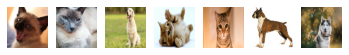

In [31]:
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np

#Cargar imagen desde un archivo local
path ='../Imagenes/'
files = ['Mila.jpg', 'Zeus.jpg', 'perro.jpg', 'gato.webp',
         'gato.png', 'boxer.jpg', 'siberiano.webp']
size = 150

x = []

print('Mis gatos y un perro')

for i, file in enumerate(files):
    img=image.load_img(path+file, target_size=(size, size))
    sp = plt.subplot(1, len(files), i + 1)
    sp.axis('Off') 
    plt.imshow(img)
    
    array = np.reshape(image.img_to_array(img), newshape =(1,size,size,3))
    x.append(array)    

images = np.vstack(x)
print('tamano del tensor', images.shape)

### <span style="color:#4CC9F0">Predicciones</span>

In [34]:
is_perro= model.predict(images, batch_size=2)>0.5
# Mostrar resultados
print(is_perro)
    
for i, fn in enumerate(files):
    #Clasificar
    if is_perro[i]:
        print(fn + " Es un Perro")

    else:
        print(fn + " Es un Gato")

[[False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [ True]]
Mila.jpg Es un Gato
Zeus.jpg Es un Gato
perro.jpg Es un Gato
gato.webp Es un Gato
gato.png Es un Gato
boxer.jpg Es un Gato
siberiano.webp Es un Perro


[[Volver al Inicio]](#Contenido)